In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings

from folium.plugins import FastMarkerCluster

warnings.filterwarnings('ignore')

In [59]:
pubs_data = pd.read_csv("/content/data-tidying-pubs-data.csv", index_col=[0])
police_data = pd.read_csv("/content/data-wrangling-police_data.csv", index_col=[0])
metro_data = pd.read_csv("/content/raw-london-underground.csv", index_col=[0])
crime_data = pd.read_csv("/content/raw_london_sexual_crimes.csv", index_col=[0])

In [3]:
pubs_data.head()

name postcode                   borough   latitude  \
0     The Black Horse  EN5 4BW  London Borough of Barnet  51.653075   
1  Ye Olde Mitre Inne  EN5 5SJ  London Borough of Barnet  51.652979   
2          The Arkley  EN5 3EP  London Borough of Barnet  51.652533   
3      Railway Tavern  EN4 8RR  London Borough of Barnet  51.650059   
4      The Kings Head  EN5 5SN  London Borough of Barnet  51.653499   

   longitude  price  rating  popularity  number_of_crimes  number_of_metro  \
0  -0.206657    1.0     8.1    0.939551                30                0   
1  -0.199367    1.0     7.6    0.982768                45                1   
2  -0.219573    1.0     7.7    0.987375                 2                0   
3  -0.174692    1.0     7.4    0.950895                64                0   
4  -0.200979    1.0     6.6    0.377777                40                0   

   number_of_police  distance_metro  distance_police  metro  police  
0               2.0      904.722178       390.281423      0       1  
1               3.0      443.945965       119.561106      1       1  
2               0.0     1767.173867      1215.815963      0       0  
3               0.0     1343.248049      1149.621255      0       0  
4               3.0      568.292759        98.112834      0       1

### Pubs data analysis

### Map with Pubs, Underground and Police stations

In [8]:
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12)

In [9]:
def add_map_circle(dataframe, color, map):
  for lat, lng in zip(dataframe["latitude"], dataframe["longitude"]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(map)

In [10]:
add_map_circle(pubs_data, "#7c26ab", london_map)

In [11]:
add_map_circle(police_data, "#1f40d1", london_map)

In [12]:
add_map_circle(metro_data, "#d1541f", london_map)

In [13]:
#display map with pubs (purple), police station (blue), and subway stations (orange)
london_map

### Analysis per borough

In [ ]:
#number of pubs per borough
pubs_data["borough"].value_counts()

City of Westminster                        80
London Borough of Camden                   67
London Borough of Wandsworth               55
London Borough of Hackney                  51
London Borough of Richmond upon Thames     47
London Borough of Tower Hamlets            44
London Borough of Hammersmith & Fulham     41
Royal Borough of Kensington and Chelsea    40
London Borough of Islington                39
London Borough of Southwark                30
Royal Borough of Kingston upon Thames      29
London Borough of Lewisham                 29
Royal Borough of Greenwich                 27
London Borough of Haringey                 25
London Borough of Ealing                   24
London Borough of Waltham Forest           22
London Borough of Merton                   21
London Borough of Enfield                  21
London Borough of Newham                   20
London Borough of Hounslow                 18
London Borough of Croydon                  16
London Borough of Sutton          

In [14]:
pubs_borough = pubs_data.groupby("borough")["name"].count().reset_index()

[]

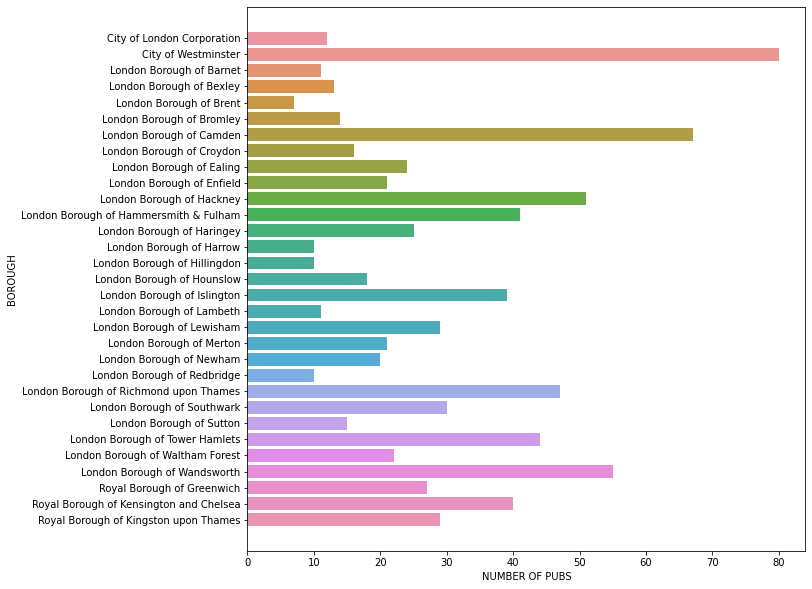

In [25]:
plt.figure(figsize=(10, 10))
sns.barplot(x="name", y="borough", data=pubs_borough)
plt.xlabel("NUMBER OF PUBS")
plt.ylabel("BOROUGH")
plt.plot()

In [26]:
pubs_rating = pubs_data.groupby("borough")["rating"].mean().sort_values(ascending=False).reset_index()

[]

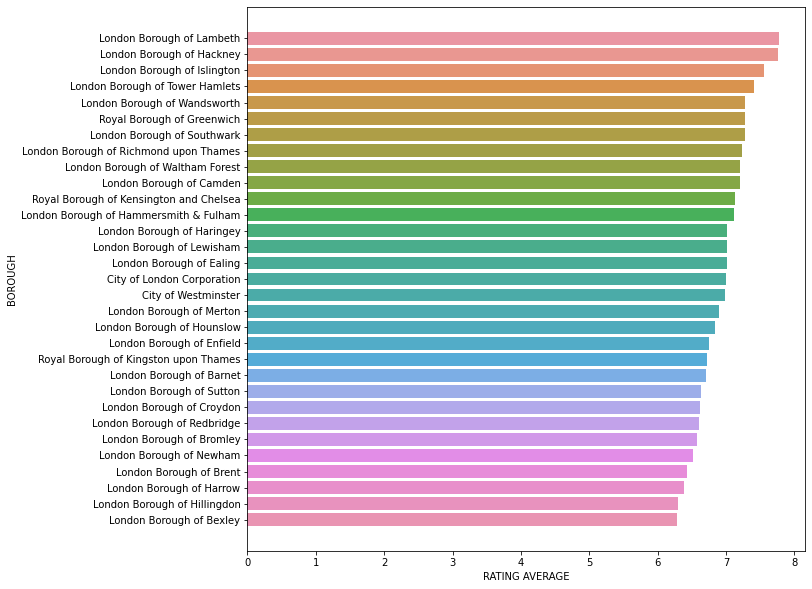

In [39]:
plt.figure(figsize=(10, 10))
sns.barplot(x="rating", y="borough", data=pubs_rating)
plt.xlabel("RATING AVERAGE")
plt.ylabel("BOROUGH")
plt.plot()

In [41]:
metro_distance = pubs_data.groupby("borough")["distance_metro"].mean().sort_values().reset_index()

In [ ]:
metro_distance

[]

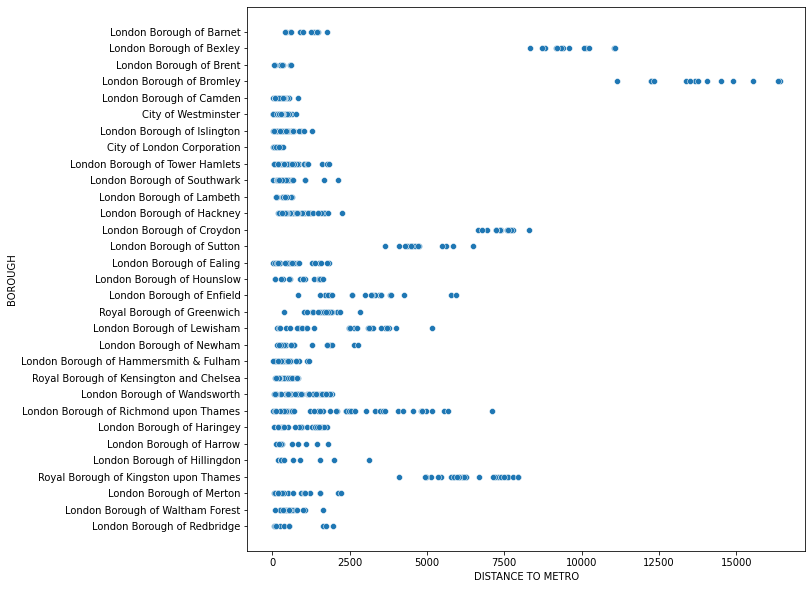

In [45]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="distance_metro", y="borough", data=pubs_data)
plt.xlabel("DISTANCE TO METRO")
plt.ylabel("BOROUGH")
plt.plot()


In [ ]:
pubs_data.groupby("borough")["distance_police"].mean().sort_values()

borough
City of Westminster                         343.670525
London Borough of Lambeth                   355.476055
City of London Corporation                  384.050898
Royal Borough of Kensington and Chelsea     509.421710
London Borough of Southwark                 511.080627
London Borough of Islington                 516.831854
London Borough of Camden                    517.659765
London Borough of Croydon                   524.060844
London Borough of Richmond upon Thames      533.294725
London Borough of Waltham Forest            559.745396
Royal Borough of Greenwich                  583.033764
London Borough of Hammersmith & Fulham      609.088784
Royal Borough of Kingston upon Thames       611.124488
London Borough of Sutton                    633.540071
London Borough of Wandsworth                634.096877
London Borough of Newham                    640.051014
London Borough of Merton                    686.735547
London Borough of Tower Hamlets             691.714348
Lo

[]

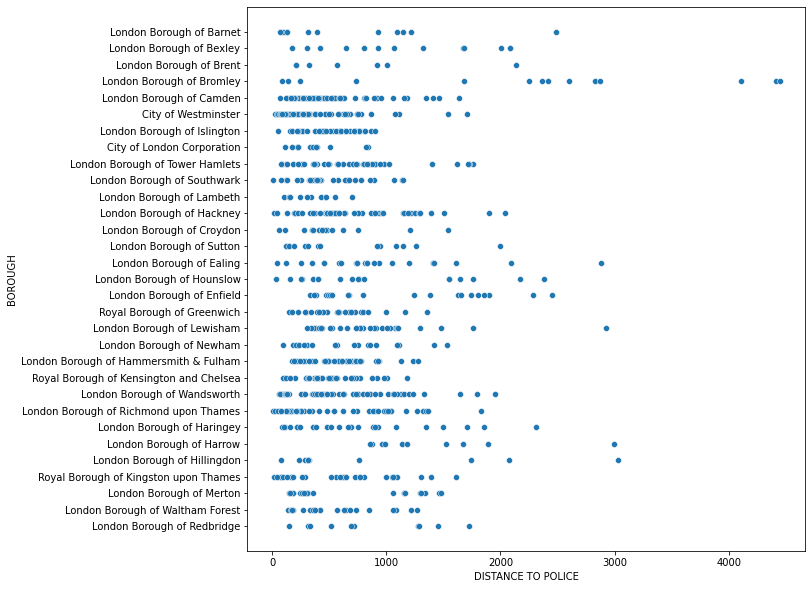

In [47]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="distance_police", y="borough", data=pubs_data)
plt.xlabel("DISTANCE TO POLICE")
plt.ylabel("BOROUGH")
plt.plot()

[]

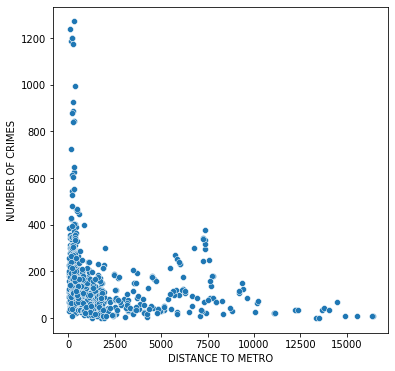

In [50]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="distance_metro", y="number_of_crimes", data=pubs_data)
plt.xlabel("DISTANCE TO METRO")
plt.ylabel("NUMBER OF CRIMES")
plt.plot()

[]

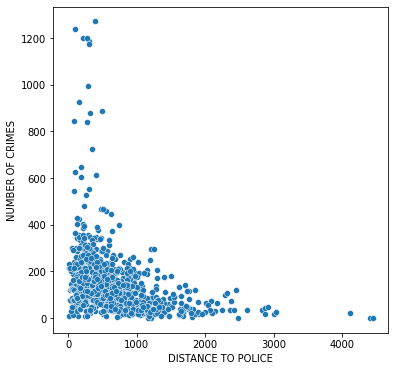

In [54]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="distance_police", y="number_of_crimes", data=pubs_data)
plt.xlabel("DISTANCE TO POLICE")
plt.ylabel("NUMBER OF CRIMES")
plt.plot()

[]

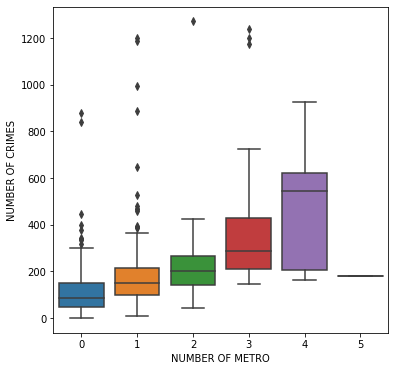

In [53]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="number_of_metro", y="number_of_crimes", data=pubs_data)
plt.xlabel("NUMBER OF METRO")
plt.ylabel("NUMBER OF CRIMES")
plt.plot()

[]

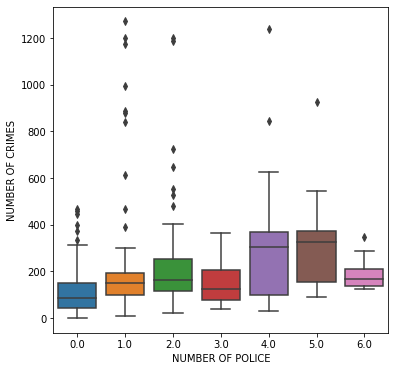

In [55]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="number_of_police", y="number_of_crimes", data=pubs_data)
plt.xlabel("NUMBER OF POLICE")
plt.ylabel("NUMBER OF CRIMES")
plt.plot()

[]

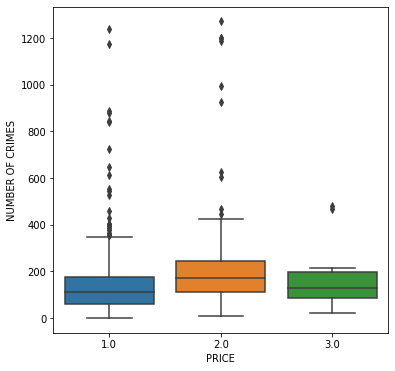

In [56]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="price", y="number_of_crimes", data=pubs_data)
plt.xlabel("PRICE")
plt.ylabel("NUMBER OF CRIMES")
plt.plot()

### Pairplot

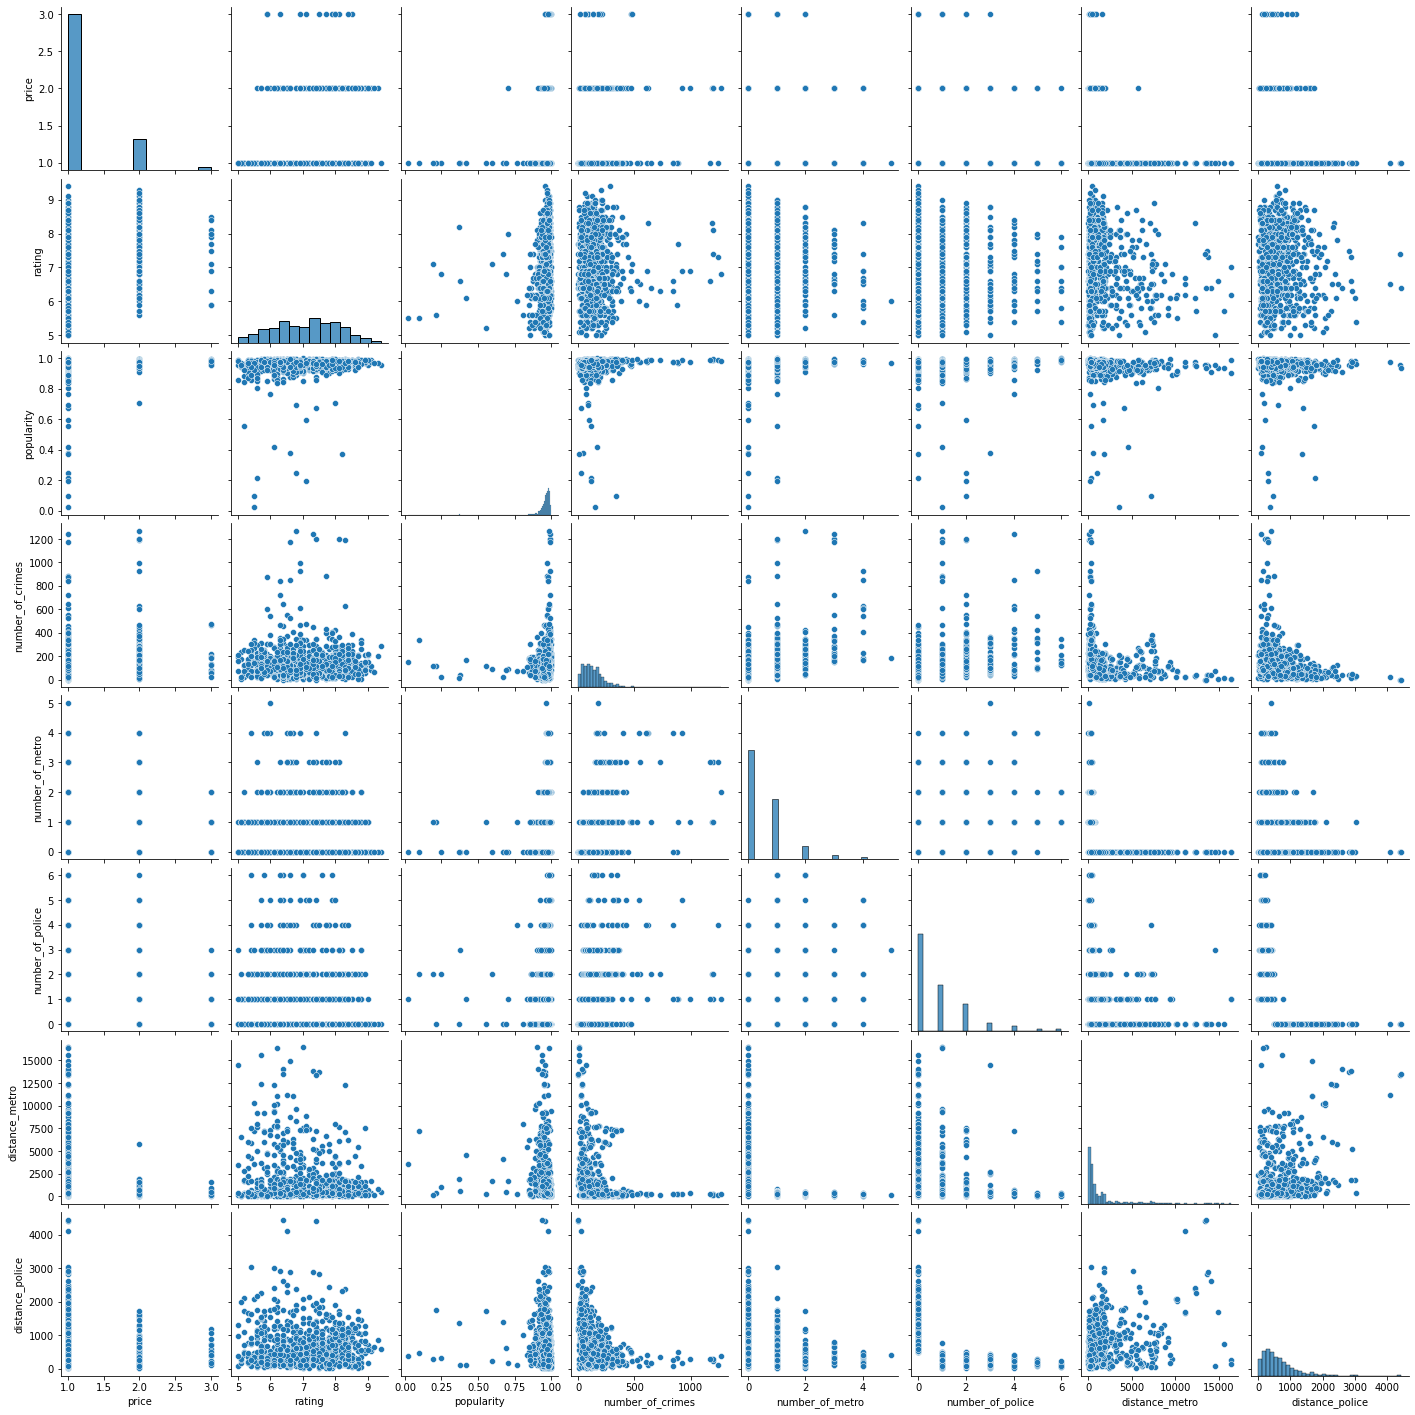

In [57]:
sns.pairplot(pubs_data[["price", "rating", "popularity", "number_of_crimes", "number_of_metro", "number_of_police", "distance_metro", "distance_police"]])

### Crimes

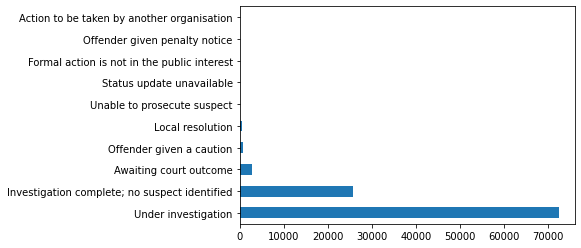

In [61]:
#crimes outcome
crime_data["Last outcome category"].value_counts().plot(kind="barh")

#### Crime Cluster Map

In [6]:
crime_map = folium.Map(location=[51.509865, -0.118092],
                        zoom_start=10,
                        )

FastMarkerCluster(data=list(zip(crime_data['Latitude'].values, crime_data['Longitude'].values))).add_to(crime_map)
folium.LayerControl().add_to(crime_map)

In [7]:
crime_map